In [21]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("titanic.csv")

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df2 = df[['Pclass', 'Fare', 'Age', 'Sex', 'Survived']]
df2

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,male,0
1,1,71.2833,38.0,female,1
2,3,7.9250,26.0,female,1
3,1,53.1000,35.0,female,1
4,3,8.0500,35.0,male,0
...,...,...,...,...,...
886,2,13.0000,27.0,male,0
887,1,30.0000,19.0,female,1
888,3,23.4500,NaN,female,0
889,1,30.0000,26.0,male,1


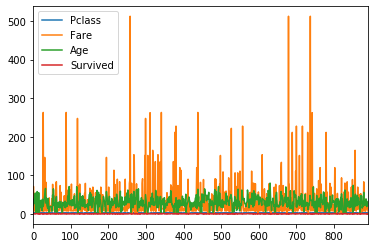

In [24]:
df2.interpolate().plot()

In [78]:
df3 = df2.dropna(axis = 0, how = 'any')
df3

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,male,0
1,1,71.2833,38.0,female,1
2,3,7.9250,26.0,female,1
3,1,53.1000,35.0,female,1
4,3,8.0500,35.0,male,0
...,...,...,...,...,...
885,3,29.1250,39.0,female,0
886,2,13.0000,27.0,male,0
887,1,30.0000,19.0,female,1
889,1,30.0000,26.0,male,1


In [80]:
df3['Sex'] = df3['Sex'].apply(lambda x: 0 if x == 'female' else 1)
df3['Fare'] = df3['Fare'].apply(lambda x: int(x*100))
df3['Age'] = df3['Age'].apply(lambda x: int(x*100))

C:\Users\HEKKA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HEKKA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HEKKA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [81]:
df3

,Pclass,Fare,Age,Sex,Survived
0,3,725,2200,1,0
1,1,7128,3800,0,1
2,3,792,2600,0,1
3,1,5310,3500,0,1
4,3,805,3500,1,0
...,...,...,...,...,...
885,3,2912,3900,0,0
886,2,1300,2700,1,0
887,1,3000,1900,0,1
889,1,3000,2600,1,1


In [95]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
features = ['Pclass', 'Fare', 'Age', 'Sex']
df4 = df3.drop(features,axis=1)
X = df3
X = X.drop(['Survived'], axis=1)
y = df4

In [96]:
X

,Pclass,Fare,Age,Sex
0,3,725,2200,1
1,1,7128,3800,0
2,3,792,2600,0
3,1,5310,3500,0
4,3,805,3500,1
...,...,...,...,...
885,3,2912,3900,0
886,2,1300,2700,1
887,1,3000,1900,0
889,1,3000,2600,1


In [97]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [98]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
dt.feature_importances_

array([0.14796282, 0.27884587, 0.27177329, 0.30141803])

In [100]:
importances = dt.feature_importances_
print(importances)

[0.14796282 0.27884587 0.27177329 0.30141803]


In [101]:
dict(zip(df3.columns, importances))

{'Pclass': 0.14796281544283826,
 'Fare': 0.27884587142134126,
 'Age': 0.27177328766440034,
 'Sex': 0.30141802547142005}